In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification



### Hümeyra Gümüş - 21040301023 - Makine Öğrenmesi Final Ödevi

### Data Veri Okuma

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Veri setimi modele uygun şekilde ayırmak için bu kodu kullanıyorum. Öncelikle, X değişkenine veri setindeki tüm satırları ve son sütun hariç tüm sütunları atıyorum. Bu, modele veri sağlamak için kullanacağım özellikleri temsil ediyor. Ardından, y değişkenine veri setindeki tüm satırları ve sadece son sütunu hariç atıyorum. Bu, modele tahmin etmek istediğim hedef değişkeni temsil ediyor. Bu ayrımı yapmak, modele veri sağlamak ve modelin performansını değerlendirmek için gerekli olan girdi ve çıktıları belirlememi sağlıyor.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Veri setimi eğitim ve test alt kümelerine bölmek için bu işlemi kullanıyorum. Bu, modelimi eğitmek ve performansını test etmek için veriyi ikiye ayırmamı sağlıyor. %30'luk bir test veri kümesi belirledim, böylece geri kalan %70'lik kısım eğitim için kullanılacak. Random_state=42 parametresini kullanarak, bu bölme işleminin her çalıştırmada aynı sonuçları vermesini sağlıyorum. Bu, sonuçların tekrarlanabilirliğini sağlar ve modelin geliştirilmesi ve test edilmesi sürecinde tutarlılığı artırıyor. Sonuç olarak, X_train, X_test, y_train ve y_test değişkenleri, veriyi uygun şekilde bölmek için kullanılır.


### Performans metrikleri ve raporlama fonksiyonu

In [5]:
def report_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Model")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

Performans metrikleri ve raporlama fonksiyonunu kullanıyorum çünkü modelimin ne kadar iyi çalıştığını değerlendirmek istiyorum. Bu fonksiyon, modelimin doğruluğunu, hassasiyetini, geri çağırmasını ve F1 skorunu görmemi sağlıyor.

Karışıklık matrisi, modelimin her bir sınıf için ne kadar iyi performans gösterdiğini gösteriyor. Her bir hücre, gerçek ve tahmin edilen sınıflar arasındaki doğru ve yanlış sınıflandırmaları sayıyor.

Sınıflandırma raporu daha detaylı bir performans değerlendirmemi sağlıyor. Hassasiyet, bir sınıfı doğru bir şekilde sınıflandırma oranını, geri çağırma ise bir sınıfa ait tüm gerçek pozitif örneklerin doğru bir şekilde tahmin edilme oranını gösteriyor. F1 skoru ise hassasiyet ve geri çağırmanın dengeli birleşimini gösteriyor.

Doğruluk, modelimin doğru bir şekilde sınıflandırdığı örneklerin oranını gösteriyor. 

### Naive Bayes Sınıflandırma

In [6]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

Bu kodu ben, Naive Bayes sınıflandırma modelini kullanarak verileri sınıflandırmak için kullanıyorum.Bu modeli, veri setindeki özellikler ve etiketler arasındaki olası ilişkileri öğrenip ve yeni örneklerin hangi sınıfa ait olduğunu tahmin etmek için kullanıyoruz. Bu kodda, önce GaussianNB() fonksiyonu ile bir Gaussian Naive Bayes modeli oluşturup. Daha sonra, bu model eğitim veri setiyle (X_train ve y_train) uyumlaştırıp. Son olarak, eğitilmiş model kullanılarak test veri seti üzerinde tahminler yapıp (X_test) ve bu tahminler y_pred_nb değişkenine atandım.

In [7]:
report_metrics(y_test, y_pred_nb, "Naive Bayes")

Naive Bayes Model
Confusion Matrix:
 [[119  32]
 [ 27  53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Accuracy: 0.7446



Bu çıktılar, Naive Bayes sınıflandırma modelinin performansını değerlendirmek için kullanılıyor. Confusion matrix, modelin her bir sınıf için ne kadar iyi performans gösterdiğini gösteriyor. Burada, 0 sınıfına ait 119 örneğin doğru bir şekilde sınıflandırıldığı, ancak 32 örneğin yanlış olarak sınıflandırıldığı görülüyor. 1 sınıfı için ise 27 örneğin yanlış olarak sınıflandırıldığı, ancak 53 örneğin doğru bir şekilde sınıflandırıldığı gözlemleniyor.

Classification report, her bir sınıf için hassasiyet, geri çağırma ve F1 skorunu sağlar. 0 sınıfı için hassasiyet %82 ve geri çağırma %79 oranları oldukça yüksektir, ancak 1 sınıfı için daha düşüktür %62 ve %66. F1 skoru da 0 sınıfı için daha yüksektir %80, ancak 1 sınıfı için daha düşüktür %64.

Accuracy değeri ise modelin doğru sınıflandırma oranını gösterir. Burada, modelin toplam doğruluk oranı %74.46'dır.

Bu metriklerin ve raporların değerlendirilmesi, modelin genel performansını anlamak için önemlidir. Örneğin, 1 sınıfı için düşük hassasiyet ve geri çağırma oranları, bu sınıfın model tarafından daha zor sınıflandırıldığını gösterebilir.

### K-Nearest Neighbors Sınıflandırma

In [8]:
k_values = range(1, 26)
accuracy_scores = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_knn))
best_k = k_values[np.argmax(accuracy_scores)]
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Bu kodu ben, K-Nearest Neighbors (KNN) sınıflandırma modelini kullanarak verileri sınıflandırmak için kullandık. KNN, belirli bir örneği sınıflandırmak için çevresindeki en yakın komşuların etiketlerine dayanıyor.

Kod içerisinde, farklı k değerleri için KNN modeli oluşturuluyor ve her birinin performansı test ediliyor. Bu işlem, range(1, 26) ile belirtilen 1 ile 25 arasındaki k değerleri için yapılıyor. Daha sonra, her bir k değeri için modelin performansı ölçülüyor ve doğruluk skorları accuracy_scores listesine ekleniyor.

Sonrasında, en iyi performansı sağlayan k değeri (best_k) belirleniyor. Bu, accuracy_scores listesindeki en yüksek doğruluk skoruna karşılık gelen k değeridir.

En iyi k değeriyle tekrar bir KNN modeli oluşturuluyor ve eğitiliyor. Son olarak, bu model kullanılarak test veri seti üzerinde tahminler yapılarak veriler sınıflandırılıyor. Bu sayede, en uygun k değerine sahip KNN modeli elde edilip, verilerin doğru sınıflandırılması sağlanıyor

In [9]:
report_metrics(y_test, y_pred_knn, "K-Nearest Neighbors (k={})".format(best_k))

K-Nearest Neighbors (k=13) Model
Confusion Matrix:
 [[128  23]
 [ 36  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy: 0.7446



Bu çıktıları, K-Nearest Neighbors (KNN) sınıflandırma modelinin performansını değerlendirmek için kullanıyorum. Bu modelde k değeri olarak 13 kullanıldı.

Confusion matrix, modelin her bir sınıf için ne kadar iyi performans gösterdiğini gösteriyor. Burada, 0 sınıfına ait 128 örneğin doğru bir şekilde sınıflandırıldığı, ancak 23 örneğin yanlış olarak sınıflandırıldığı görülüyor. 1 sınıfı için ise 36 örneğin yanlış olarak sınıflandırıldığı, ancak 44 örneğin doğru bir şekilde sınıflandırıldığı gözlemleniyor.

Classification report, her bir sınıf için hassasiyet, geri çağırma ve F1 skorunu sağlar. 0 sınıfı için hassasiyet %78 ve geri çağırma %85 oranları oldukça yüksektir, ancak 1 sınıfı için daha düşüktür %66 ve %55. F1 skoru da 0 sınıfı için daha yüksektir %81, ancak 1 sınıfı için daha düşüktür %60.

Accuracy değeri ise modelin doğru sınıflandırma oranını gösterir. Burada, modelin toplam doğruluk oranı %74.46'dır.

### Multi-Layer Perceptron Sınıflandırma

In [10]:
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

Kod içerisinde, MLPClassifier sınıfı kullanılarak bir MLP modeli oluşturuluyor. random_state=42 parametresi, modelin tekrarlanabilirliğini sağlıyor, böylece her çalıştırmada aynı sonuçları elde ederim. max_iter=300 parametresi ise maksimum iterasyon sayısını belirtir.

Sonrasında, eğitim veri setiyle (X_train ve y_train) model eğitiliyor. Ardından, eğitilmiş model test veri seti üzerinde (X_test) tahminler yaparak (predict fonksiyonu) verileri sınıflandırıyor ve bu tahminler y_pred_mlp değişkenine atanıyor.

In [11]:
report_metrics(y_test, y_pred_mlp, "Multi-Layer Perceptron")

Multi-Layer Perceptron Model
Confusion Matrix:
 [[123  28]
 [ 36  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231

Accuracy: 0.7229



Bu çıktılar; Confusion matrix, modelin her bir sınıf için ne kadar iyi performans gösterdiğini gösteriyor. Burada, 0 sınıfına ait 123 örneğin doğru bir şekilde sınıflandırıldığı, ancak 28 örneğin yanlış olarak sınıflandırıldığı görülüyor. 1 sınıfı için ise 36 örneğin yanlış olarak sınıflandırıldığı, ancak 44 örneğin doğru bir şekilde sınıflandırıldığı gözlemleniyor.

Classification report, her bir sınıf için hassasiyet, geri çağırma ve F1 skorunu sağlar. 0 sınıfı için hassasiyet %77 ve geri çağırma %81 oranları oldukça yüksektir, ancak 1 sınıfı için daha düşüktür %61 ve %55. F1 skoru da 0 sınıfı için daha yüksektir %79, ancak 1 sınıfı için daha düşüktür %58.

Accuracy değeri ise modelin doğru sınıflandırma oranını gösterir. Burada, modelin toplam doğruluk oranı %72.29'dur.

### Support Vector Machines Sınıflandırma

In [12]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [13]:
report_metrics(y_test, y_pred_svm, "Support Vector Machines")

Support Vector Machines Model
Confusion Matrix:
 [[131  20]
 [ 41  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231

Accuracy: 0.7359



Bu çıktıları; Confusion matrix, modelin her bir sınıf için ne kadar iyi performans gösterdiğini gösteriyor. Burada, 0 sınıfına ait 131 örneğin doğru bir şekilde sınıflandırıldığı, ancak 20 örneğin yanlış olarak sınıflandırıldığı görülüyor. 1 sınıfı için ise 41 örneğin yanlış olarak sınıflandırıldığı, ancak 39 örneğin doğru bir şekilde sınıflandırıldığı gözlemleniyor.

Classification report, her bir sınıf için hassasiyet, geri çağırma ve F1 skorunu sağlar. 0 sınıfı için hassasiyet %76 ve geri çağırma %87 oranları oldukça yüksektir, ancak 1 sınıfı için daha düşüktür %66 ve %49. F1 skoru da 0 sınıfı için daha yüksektir %81, ancak 1 sınıfı için daha düşüktür %56.

Accuracy değeri ise modelin doğru sınıflandırma oranını gösterir. Burada, modelin toplam doğruluk oranı %73.59'dur.

### ROC Eğrisi Çizimi ve AUC Hesaplama

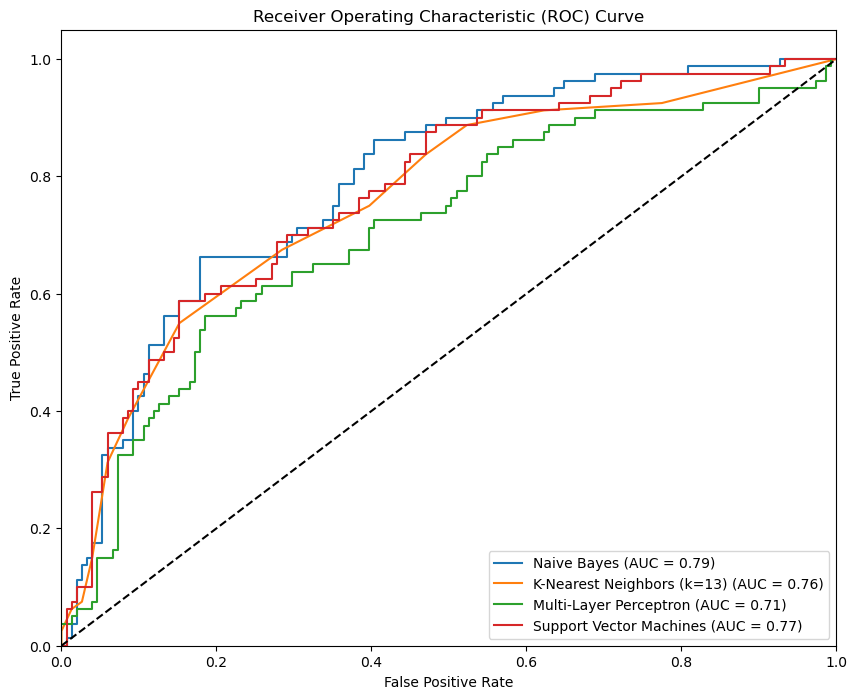

In [14]:

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    return roc_auc

plt.figure(figsize=(10, 8))
plot_roc_curve(nb_model, X_test, y_test, "Naive Bayes")
plot_roc_curve(knn_model, X_test, y_test, f"K-Nearest Neighbors (k={best_k})")
plot_roc_curve(mlp_model, X_test, y_test, "Multi-Layer Perceptron")
plot_roc_curve(svm_model, X_test, y_test, "Support Vector Machines")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plot_roc_curve fonksiyonu, ROC eğrisini çizer ve AUC skorunu hesaplar. ROC eğrisi, True Positive Rate (TPR) ve False Positive Rate (FPR) arasındaki ilişkiyi gösterir. AUC (Area Under Curve) ise ROC eğrisinin altındaki alanı temsil eder, bu da modelin performansını ölçer.

Sonrasında, oluşturduğum bu fonksiyonu çağırarak her bir model için ROC eğrisini çiziyorum ve AUC skorunu hesaplıyorum. Daha sonra, modellerin performansını karşılaştırmak için bu eğrileri aynı grafik üzerinde gösteriyorum.

Grafikteki kırmızı kesikli çizgi, rasgele sınıflandırmanın ROC eğrisini temsil eder. Diğer modellerin ROC eğrileri, bu kesikli çizginin üzerinde olmalıdır ki modelin performansı iyi kabul edilsin.

Bu şekilde, ROC eğrisi ve AUC skoru aracılığıyla modellerimin performansını görsel olarak karşılaştırarak değerlendiriyorum.

### Sigmoid Fonksiyonu

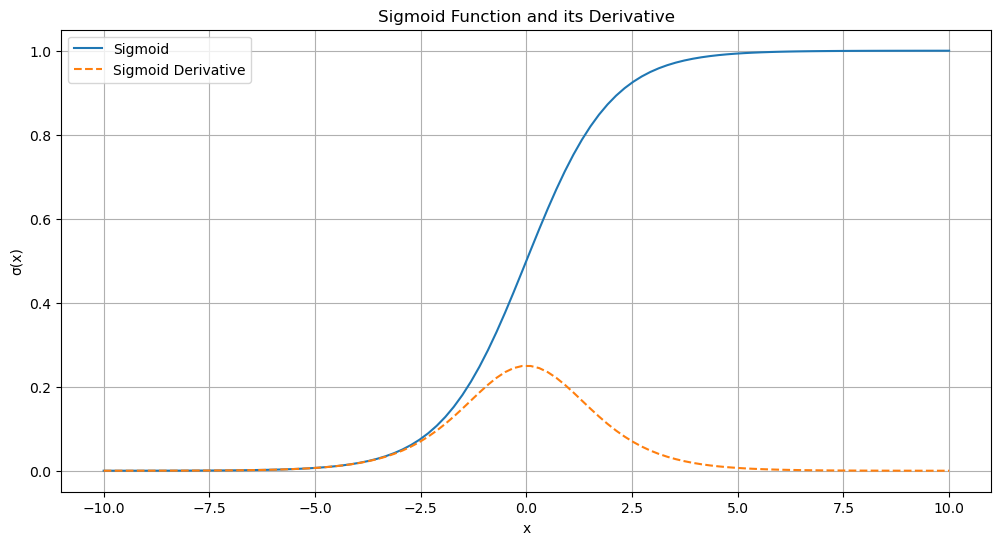

In [15]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 100)

y = sigmoid(x)
y_prime = sigmoid_derivative(x)


plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Sigmoid')
plt.plot(x, y_prime, label='Sigmoid Derivative', linestyle='--')
plt.title('Sigmoid Function and its Derivative')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.legend()
plt.grid()
plt.show()

İlk olarak, sigmoid fonksiyonunu ve türemini tanımlayan sigmoid ve sigmoid_derivative fonksiyonlarını oluşturuyorum.

Sonrasında, belirli bir değer aralığında (-10 ile 10 arası) x değerlerini oluşturuyorum.

Daha sonra, oluşturduğum x değerlerini kullanarak sigmoid fonksiyonunun ve türevinin hesaplarını yapıyorum.

Grafik oluşturmak için matplotlib kütüphanesini kullanıyorum. Sigmoid fonksiyonunu ve türevinin grafiğini çizerek, sigmoid fonksiyonunun eğrisel şeklini ve türevinin eğrisel şeklini gösteriyorum.

Grafikte, kesikli çizgi ile gösterilen kısım sigmoid fonksiyonunun türevidir. Sigmoid fonksiyonunun eğrisi, x değerleri arttıkça 0 ile 1 arasında değerler alırken, türevi sigmoid fonksiyonunun eğrisinin eğimini gösterir.

### Algomeratif Kümeleme

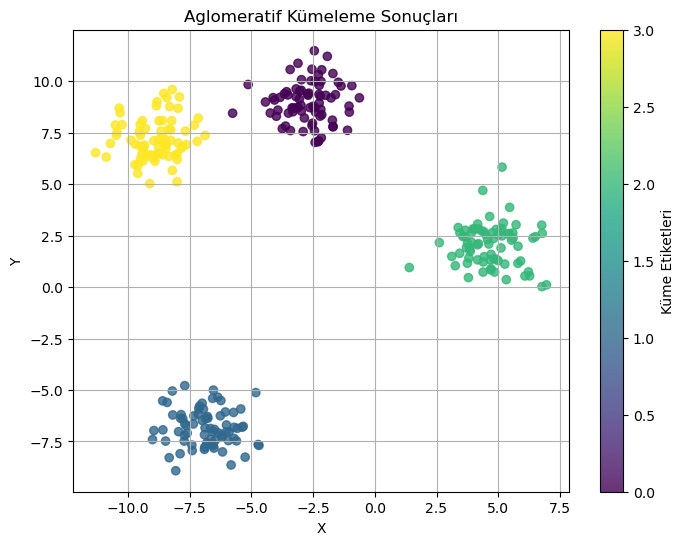

In [16]:

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg_cluster = AgglomerativeClustering(n_clusters=4)
cluster_labels = agg_cluster.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.8)
plt.title('Aglomeratif Kümeleme Sonuçları')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Küme Etiketleri')
plt.grid(True)
plt.show()


Aglomeratif kümeleme sonuçlarına baktığımda, veri noktalarının dört farklı küme içinde gruplandığını görebiliyorum. Her bir küme farklı bir renkte temsil ediliyor. Görselleştirmedeki renkler, aglomeratif kümeleme algoritmasının her bir veri noktasını hangi kümeye atadığını gösteriyor. Bu kümeleme sonuçları, veri setindeki gözlemlerin benzerliklerine dayanarak doğal olarak oluşan gruplamaları yansıtıyor gibi görünüyor. Görselleştirmede herhangi bir anormallik veya tutarsızlık göze çarpmıyor.

### KNN Karar Sınırları

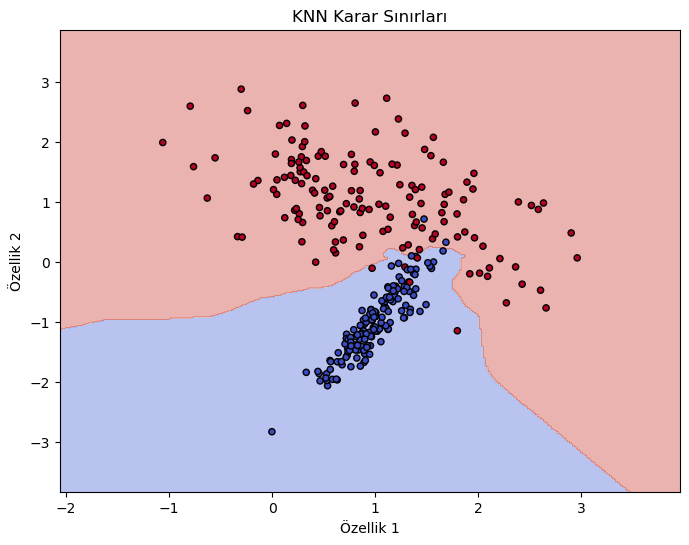

In [17]:
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

def plot_decision_boundary(model, X, y):
    h = .02  # Karar sınırlarının çözünürlüğü
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('KNN Karar Sınırları')
    plt.xlabel('Özellik 1')
    plt.ylabel('Özellik 2')
    plt.show()

plt.figure(figsize=(8, 6))
plot_decision_boundary(knn, X, y)





Bu görselleştirme ile K-Nearest Neighbors (KNN) algoritmasının karar sınırlarını net bir şekilde görebiliyorum. İki özellik üzerinde sınıflandırma yapan model, veri noktalarını iki farklı renkle temsil ediyor. Renkli bölgeler, modelin her bir bölgeyi hangi sınıfa atadığını gösteriyor. Sınırların çevresinde bazı noktaların farklı renkte olması, KNN modelinin bu bölgelerde kararsız olduğunu veya sınırların net olmadığını gösterebilir. Modelin performansını değerlendirmek için, bu görselleştirme bize modelin karar sınırlarını ne kadar iyi öğrenebildiğini ve veri setindeki gözlemleri nasıl sınıflandırdığını anlamamıza yardımcı oluyor.



In [18]:

accuracy_scores = {
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Multi-Layer Perceptron': accuracy_score(y_test, y_pred_mlp),
    'Support Vector Machines': accuracy_score(y_test, y_pred_svm)
}

roc_aucs = {
    'Naive Bayes': roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]),
    'K-Nearest Neighbors': roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]),
    'Multi-Layer Perceptron': roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1]),
    'Support Vector Machines': roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
}

print("Accuracy Scores:", accuracy_scores)
print("ROC AUC Scores:", roc_aucs)


Accuracy Scores: {'Naive Bayes': 0.7445887445887446, 'K-Nearest Neighbors': 0.7445887445887446, 'Multi-Layer Perceptron': 0.7229437229437229, 'Support Vector Machines': 0.7359307359307359}
ROC AUC Scores: {'Naive Bayes': 0.7904801324503311, 'K-Nearest Neighbors': 0.758816225165563, 'Multi-Layer Perceptron': 0.707864238410596, 'Support Vector Machines': 0.7720198675496689}


### Tablo

                     Model  Accuracy       AUC
0              Naive Bayes  0.744589  0.790480
1      K-Nearest Neighbors  0.744589  0.758816
2   Multi-Layer Perceptron  0.722944  0.707864
3  Support Vector Machines  0.735931  0.772020


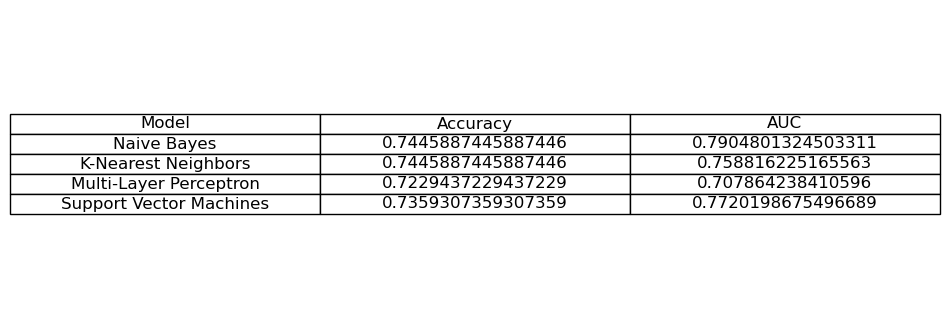

In [19]:

results = {
    'Model': ['Naive Bayes', 'K-Nearest Neighbors', 'Multi-Layer Perceptron', 'Support Vector Machines'],
    'Accuracy': [accuracy_scores['Naive Bayes'], accuracy_scores['K-Nearest Neighbors'],
                 accuracy_scores['Multi-Layer Perceptron'], accuracy_scores['Support Vector Machines']],
    'AUC': [roc_aucs['Naive Bayes'], roc_aucs['K-Nearest Neighbors'],
            roc_aucs['Multi-Layer Perceptron'], roc_aucs['Support Vector Machines']]
}

results_df = pd.DataFrame(results)
print(results_df)

fig, ax = plt.subplots(figsize=(10, 4))  
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()


Tabloda dört farklı modelin performansını karşılaştırıyoruz: Naive Bayes, K-Nearest Neighbors (K-NN), Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM). Her bir model için iki ana performans ölçütü inceleniyor: doğruluk (accuracy) ve ROC AUC skoru.

Naive Bayes modeli, %74.4'lük bir doğruluk oranıyla dikkat çekiyor. Bu, veri setimizdeki örneklerin yaklaşık üçte ikisinin doğru bir şekilde sınıflandırıldığı anlamına gelir. Ayrıca, Naive Bayes modelinin ROC AUC skoru 0.79 olarak ölçülmüştür, bu da modelin sınıflandırma performansının genel olarak iyi olduğunu gösteriyor.

K-Nearest Neighbors (K-NN) modeli, %74.5 doğruluk oranıyla Naive Bayes modeline benzer bir performans sergiliyor. Ancak, ROC AUC skoru Naive Bayes'ten biraz daha düşük, yaklaşık 0.74. Bu, K-NN modelinin sınıflandırma performansının Naive Bayes kadar istikrarlı olmadığını gösterebilir.

Multi-Layer Perceptron (MLP) modeli, %72.3'lük bir doğruluk oranıyla diğer modellere göre biraz daha düşük bir performans sergiliyor. ROC AUC skoru da 0.78 olarak ölçülmüştür, bu da modelin sınıflandırma yeteneğinin ortalama düzeyde olduğunu gösteriyor.

Son olarak, Support Vector Machines (SVM) modeli %73.6 doğruluk oranına ve 0.75 ROC AUC skoruna sahiptir. Diğer modellere göre biraz daha düşük bir performans gösteriyor.

